In [2]:
import pandas as pd
ruta = r"C:\Users\favil\ProjecteData\Equip_16\Data\banca_06.10_dataset.csv"
trans = pd.read_csv(ruta)
trans

,id,age,job,marital,education,default,balance,housing,loan,contact,...,campaign,pdays,previous,poutcome,deposit,Clase de edad,Perfil,month #,date,day_week
0,1,59.0,admin.,married,secondary,no,2343,yes,no,unknown,...,1,-1,0,unknown,yes,55-64,Gen Z & Boomers,5,2008-05-05,Lunes
1,2,56.0,admin.,married,secondary,no,45,no,no,unknown,...,1,-1,0,unknown,yes,55-64,Gen Z & Boomers,5,2008-05-05,Lunes
2,3,41.0,technician,married,secondary,no,1270,yes,no,unknown,...,1,-1,0,unknown,yes,35-44,Adultxs,5,2008-05-05,Lunes
3,4,55.0,services,married,secondary,no,2476,yes,no,unknown,...,1,-1,0,unknown,yes,55-64,Gen Z & Boomers,5,2008-05-05,Lunes
4,5,54.0,admin.,married,tertiary,no,184,no,no,unknown,...,2,-1,0,unknown,yes,45-54,Divorciadxs,5,2008-05-05,Lunes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26171,26383,35.0,admin.,single,secondary,no,182,yes,no,unknown,...,1,-1,0,unknown,no,35-44,Adultxs,6,2008-06-03,Martes
26172,26384,53.0,management,married,unknown,no,527,yes,no,cellular,...,3,-1,0,unknown,no,45-54,Divorciadxs,7,2008-07-23,Miércoles
26173,26385,26.0,student,single,tertiary,no,39,no,no,cellular,...,3,-1,0,unknown,yes,25-34,Millenials,5,2008-05-26,Lunes
26174,26386,86.0,retired,married,primary,no,5236,no,no,telephone,...,2,-1,0,unknown,yes,65+,Gen Z & Boomers,4,2008-04-01,Martes


In [ ]:

def imputar(row):
    # 1) age
    if pd.isna(row["age"]):
        if row["job"] == "retired":
            row["age"] = 65
        elif row["job"] == "management":
            row["age"] = 45
        elif row["job"] == "technician":
            row["age"] = 35
        else:
            row["age"] = 40
    
    # 2) marital
    if pd.isna(row["marital"]):
        row["marital"] = "single" if row["age"] < 32 else "married"
    
    # 3) education
    if pd.isna(row["education"]):
        if row["job"] in ["management", "technician"]:
            row["education"] = "tertiary"
        elif row["job"] == "retired":
            row["education"] = "secondary"
        else:
            row["education"] = "primary"
    
    # 4) job
    if pd.isna(row["job"]):
        if row["education"] == "tertiary":
            row["job"] = "management"
        elif row["education"] == "secondary":
            row["job"] = "technician"
        else:
            row["job"] = "unknown"
    # 5) housing
    if pd.isna(row["housing"]):
        if row["Clase de edad"] == "25-34":
            row["housing"] = "yes"
        else:
            row["housing"] = "no"
    return row

Coordenadas de las filas:
              0         1
0      0.262495 -0.174401
1      0.330406  0.136778
2     -0.076956 -0.320674
3      0.279404 -0.233663
4      0.041977  0.178888
...         ...       ...
26171 -0.380473 -0.484300
26172  0.119670 -0.042000
26173 -0.989561  1.186978
26174  1.849167  1.189677
26175 -0.403059 -0.459694

[26176 rows x 2 columns]

Coordenadas de las categorías (columnas):
                             0         1
Clase de edad__18-24 -1.647919  1.976075
Clase de edad__25-34 -0.722359  0.083092
Clase de edad__35-44 -0.080976 -0.417485
Clase de edad__45-54  0.352945 -0.385300
Clase de edad__55-64  1.101625  0.386543
Clase de edad__65+    2.825596  2.125111
job__admin.          -0.242478 -0.459921
job__blue-collar      0.314348 -0.891612
job__entrepreneur     0.209523 -0.476222
job__housemaid        1.147910 -0.017540
job__management      -0.403679  0.498526
job__retired          2.461713  1.526866
job__self-employed   -0.322226  0.218347
job__services      

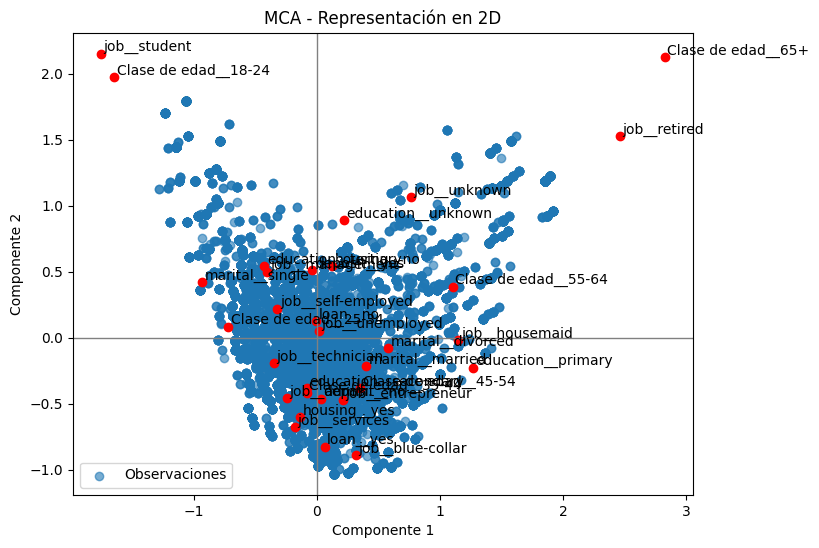

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prince


trans = trans[["Clase de edad","job","marital","education","housing","loan","deposit"]]
# trans = trans[["Clase de edad","job","marital","education","deposit"]]
# Crear DataFrame para graficar
# Ajustar el MCA
mca = prince.MCA(
    n_components=2,
    random_state=42
)

mca = mca.fit(trans)

# Coordenadas de las filas (observaciones en los ejes MCA)
row_coords = mca.row_coordinates(trans)

# Coordenadas de las columnas (categorías en el espacio MCA)
col_coords = mca.column_coordinates(trans)

print("Coordenadas de las filas:")
print(row_coords)

print("\nCoordenadas de las categorías (columnas):")
print(col_coords)

fig, ax = plt.subplots(figsize=(8, 6))

# Puntos de las observaciones
ax.scatter(row_coords[0], row_coords[1], alpha=0.6, label="Observaciones")

# Puntos de las categorías
for i, (x, y) in enumerate(zip(col_coords[0], col_coords[1])):
    ax.scatter(x, y, color="red")
    ax.text(x+0.02, y+0.02, col_coords.index[i], fontsize=10)

ax.axhline(0, color="grey", lw=1)
ax.axvline(0, color="grey", lw=1)
ax.set_title("MCA - Representación en 2D")
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
plt.legend()
plt.show()